<a href="https://colab.research.google.com/github/LoreBonora/IntroGit/blob/master/Intro_CD_aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
!pip install gitly

In [83]:
from gitly.colab.plot import GitlyPlotter

gitly = GitlyPlotter(renderer='github')

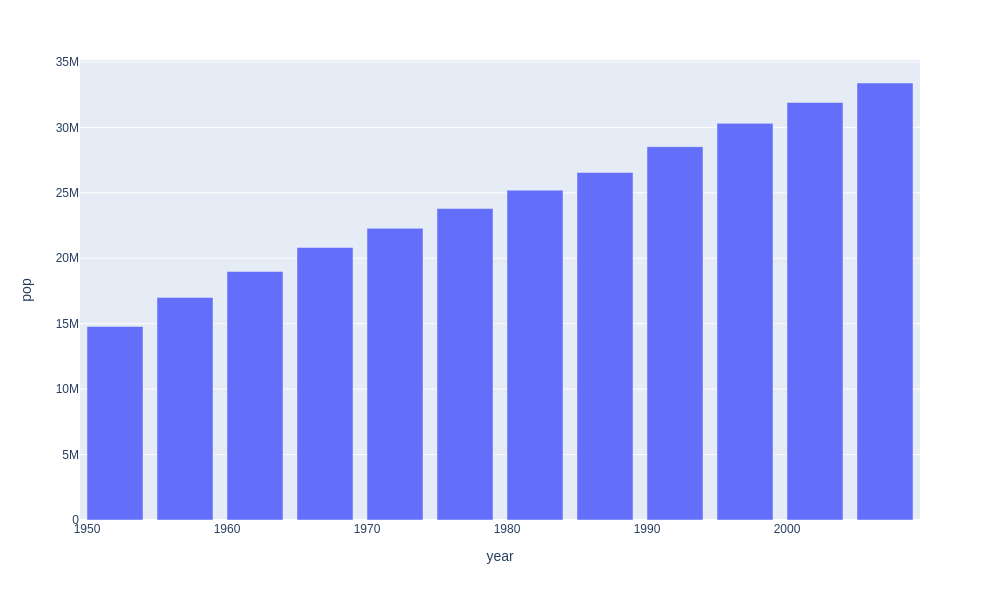

In [84]:
import plotly.express as px
data_canada = px.data.gapminder().query("country == 'Canada'")

fig = px.bar(data_canada, x='year', y='pop')
gitly.show(fig, width = 1000, height = 600)

# Carregar bibliotecas importantes

In [85]:
import pandas as pd
import numpy as np

#Carregar os CSVs

In [86]:
df_clientes = pd.read_csv('/content/drive/My Drive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_customers_dataset.csv')
df_geo = pd.read_csv('/content/drive/My Drive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_geolocation_dataset.csv', encoding='utf8')
df_compra_itens = pd.read_csv('/content/drive/My Drive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_order_items_dataset.csv')
df_compra_pagamentos = pd.read_csv('/content/drive/My Drive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('/content/drive/My Drive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_order_reviews_dataset.csv')
df_compras = pd.read_csv('/content/drive/My Drive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_orders_dataset.csv')
df_produtos = pd.read_csv('/content/drive/My Drive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_products_dataset.csv')
df_vendedores = pd.read_csv('/content/drive/My Drive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_sellers_dataset.csv')

#Esploração Dataset de clientes

In [87]:
#Conhecendo o dataset
df_clientes.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [88]:
#Quais cidades tem no dataset
df_clientes.customer_city.unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [89]:
#Quantas cidades diferentes tempos no dataset?
len(df_clientes.customer_city.unique())

4119

In [90]:
#Quantos clientes no total temos?
len(df_clientes.customer_unique_id.unique())

96096

In [91]:
df_clientes.groupby(by='customer_city').count().sort_values(by = 'customer_id', ascending = False).head(7)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state
customer_city,,,,
sao paulo,15540,15540,15540,15540
rio de janeiro,6882,6882,6882,6882
belo horizonte,2773,2773,2773,2773
brasilia,2131,2131,2131,2131
curitiba,1521,1521,1521,1521
campinas,1444,1444,1444,1444
porto alegre,1379,1379,1379,1379


In [92]:
df_clientes.customer_city.value_counts().head(7).reset_index()#groupby + count + sort values 

,index,customer_city
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379


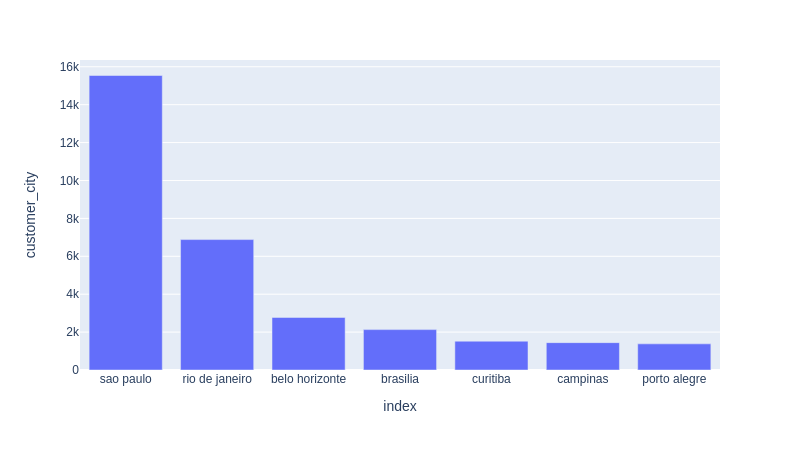

In [93]:
import plotly.express as px

data = df_clientes.customer_city.value_counts().head(7).reset_index()

fig = px.bar(data, x='index', y='customer_city')
gitly.show( fig )

In [94]:
#Quantos clientes temos por cidades?
#df_clientes.groupby(by =["customer_city", "customer_unique_id"]).count()
df_group = df_clientes.groupby(by ="customer_unique_id").count()
df_group[(df_group['customer_id']>=4)]

,customer_id,customer_zip_code_prefix,customer_city,customer_state
customer_unique_id,,,,
083ca1aa470c280236380973a48f77c6,4,4,4,4
08e5b38d7948d37fbb2a59fc5e175ab1,4,4,4,4
12d8b5ed661190a3a08183644dfc504d,4,4,4,4
12f5d6e1cbf93dafd9dcc19095df0b3d,6,6,6,6
1b6c7548a2a1f9037c1fd3ddfed95f33,7,7,7,7
25a560b9a6006157838aab1bdbd68624,4,4,4,4
2ddc001b620bd90d0f4378cfde1db887,4,4,4,4
35ecdf6858edc6427223b64804cf028e,5,5,5,5
394ac4de8f3acb14253c177f0e15bc58,5,5,5,5


In [95]:
df_geo.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [96]:
df_compra_itens.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [97]:
df_compra_pagamentos.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [98]:
df_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [99]:
df_compras.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [100]:
df_produtos.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [101]:
df_vendedores.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
